<a href="https://colab.research.google.com/github/LazyHooks/ACN_clustering/blob/main/consult_ben.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [2]:
import warnings

warnings.filterwarnings('ignore')

input

In [3]:
df = pd.read_csv("ben_consult.csv")

exploratory

In [4]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Level       208 non-null    int64
 1   Gender      208 non-null    int64
 2   Tenure      208 non-null    int64
 3   KT          208 non-null    int64
 4   Ext Parity  208 non-null    int64
 5   med1        208 non-null    int64
 6   med2        208 non-null    int64
 7   med3        208 non-null    int64
 8   lv1         208 non-null    int64
 9   lv2         208 non-null    int64
 10  lv3         208 non-null    int64
 11  ben1        208 non-null    int64
 12  ben2        208 non-null    int64
 13  ben3        208 non-null    int64
dtypes: int64(14)
memory usage: 22.9 KB


In [5]:
df.head()

,Level,Gender,Tenure,KT,Ext Parity,med1,med2,med3,lv1,lv2,lv3,ben1,ben2,ben3
0,0,0,3,0,0,13,14,16,1,3,5,2,5,3
1,1,0,1,1,0,12,13,15,2,4,3,3,4,6
2,1,1,1,0,1,12,14,13,2,7,1,1,2,4
3,1,1,1,1,0,16,13,12,6,7,5,3,6,5
4,1,1,2,0,0,16,13,15,1,4,2,2,3,1


checks

In [6]:
df.isnull().sum()
df.describe()

,Level,Gender,Tenure,KT,Ext Parity,med1,med2,med3,lv1,lv2,lv3,ben1,ben2,ben3
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.855769,0.668269,2.206731,0.495192,0.375000,13.375000,13.735577,13.673077,4.211538,3.754808,3.543269,2.908654,3.091346,3.288462
std,0.588427,0.471971,1.103597,0.501183,0.485291,1.305414,1.240338,1.365144,2.563863,2.113329,1.923175,1.534254,1.684347,1.607188
min,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,12.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,12.000000,13.000000,12.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,1.000000,1.000000,2.000000,0.000000,0.000000,13.000000,14.000000,14.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,1.000000,1.000000,3.000000,1.000000,1.000000,14.000000,15.000000,15.000000,7.000000,6.000000,5.000000,4.000000,4.000000,5.000000
max,2.000000,1.000000,4.000000,1.000000,1.000000,16.000000,16.000000,16.000000,8.000000,8.000000,8.000000,6.000000,6.000000,6.000000


In [7]:
X=df

Scaling

In [8]:
cols = X.columns

In [9]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [10]:
X = pd.DataFrame(X, columns=[cols])

In [11]:
X.head()

,Level,Gender,Tenure,KT,Ext Parity,med1,med2,med3,lv1,lv2,lv3,ben1,ben2,ben3
0,0.0,0.0,0.666667,0.0,0.0,0.25,0.50,1.00,0.000000,0.285714,0.571429,0.2,0.8,0.4
1,0.5,0.0,0.000000,1.0,0.0,0.00,0.25,0.75,0.142857,0.428571,0.285714,0.4,0.6,1.0
2,0.5,1.0,0.000000,0.0,1.0,0.00,0.50,0.25,0.142857,0.857143,0.000000,0.0,0.2,0.6
3,0.5,1.0,0.000000,1.0,0.0,1.00,0.25,0.00,0.714286,0.857143,0.571429,0.4,1.0,0.8
4,0.5,1.0,0.333333,0.0,0.0,1.00,0.25,0.75,0.000000,0.428571,0.142857,0.2,0.4,0.0


In [12]:
X.dropna(inplace=True)
X

,Level,Gender,Tenure,KT,Ext Parity,med1,med2,med3,lv1,lv2,lv3,ben1,ben2,ben3
0,0.0,0.0,0.666667,0.0,0.0,0.25,0.50,1.00,0.000000,0.285714,0.571429,0.2,0.8,0.4
1,0.5,0.0,0.000000,1.0,0.0,0.00,0.25,0.75,0.142857,0.428571,0.285714,0.4,0.6,1.0
2,0.5,1.0,0.000000,0.0,1.0,0.00,0.50,0.25,0.142857,0.857143,0.000000,0.0,0.2,0.6
3,0.5,1.0,0.000000,1.0,0.0,1.00,0.25,0.00,0.714286,0.857143,0.571429,0.4,1.0,0.8
4,0.5,1.0,0.333333,0.0,0.0,1.00,0.25,0.75,0.000000,0.428571,0.142857,0.2,0.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.5,1.0,0.000000,0.0,1.0,0.50,0.25,0.00,0.857143,0.142857,0.000000,0.2,0.0,0.4
204,1.0,1.0,1.000000,0.0,1.0,0.25,0.50,0.00,0.857143,0.142857,0.000000,0.4,0.2,0.6
205,0.5,0.0,0.666667,1.0,0.0,1.00,0.75,0.25,0.142857,0.000000,0.571429,0.0,0.4,1.0
206,0.5,1.0,0.333333,1.0,0.0,0.00,0.50,0.25,0.000000,0.857143,0.142857,0.4,0.2,0.0


K means

In [13]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [14]:
kmeans.cluster_centers_

array([[3.76190476e-01, 6.28571429e-01, 4.60317460e-01, 6.66133815e-16,
        4.19047619e-01, 3.85714286e-01, 4.78571429e-01, 4.38095238e-01,
        4.73469388e-01, 4.05442177e-01, 3.80952381e-01, 3.71428571e-01,
        4.22857143e-01, 4.72380952e-01],
       [4.80582524e-01, 7.08737864e-01, 3.43042071e-01, 1.00000000e+00,
        3.30097087e-01, 3.00970874e-01, 3.88349515e-01, 3.98058252e-01,
        4.43828017e-01, 3.81414702e-01, 3.45353675e-01, 3.92233010e-01,
        4.13592233e-01, 4.42718447e-01]])

inertia

In [15]:
kmeans.inertia_

330.3605678820149

Elbow

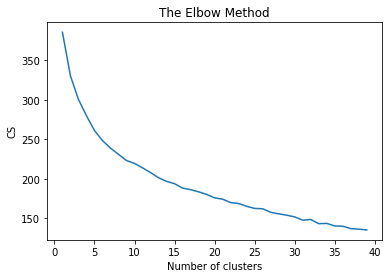

In [16]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

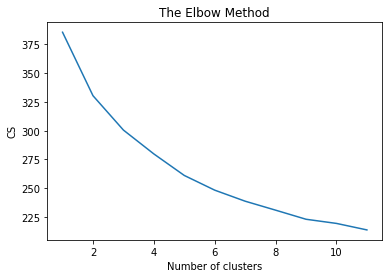

In [17]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=6, random_state=0)

In [28]:
labels=kmeans.labels_
print(labels)

[3 5 0 1 4 1 1 2 4 2 5 1 4 4 1 4 2 1 3 2 2 1 2 3 3 4 4 1 4 2 2 2 4 3 0 4 4
 5 2 1 3 3 5 4 2 1 2 3 4 2 1 2 0 4 1 0 0 0 2 3 4 3 1 4 0 1 0 2 0 5 5 0 2 1
 4 4 3 3 2 1 4 0 1 4 4 3 0 2 1 1 2 3 2 3 3 1 0 3 3 0 3 2 1 5 5 3 1 3 4 5 0
 1 2 1 0 1 5 3 4 2 4 3 3 1 5 3 1 4 3 1 1 5 0 1 3 1 4 4 0 1 2 2 2 4 4 1 1 1
 1 5 0 3 1 4 5 1 3 4 2 1 3 1 0 5 0 2 4 1 4 2 5 3 2 3 1 1 5 4 1 1 3 1 4 1 0
 4 2 3 4 4 0 2 5 1 3 3 2 3 3 3 0 1 0 0 0 5 1 0]


In [29]:
Z=kmeans.cluster_centers_
Z

array([[ 4.10714286e-01,  1.00000000e+00,  4.16666667e-01,
        -1.11022302e-16,  1.00000000e+00,  2.94642857e-01,
         4.37500000e-01,  4.37500000e-01,  3.92857143e-01,
         4.13265306e-01,  3.06122449e-01,  4.07142857e-01,
         3.92857143e-01,  4.07142857e-01],
       [ 5.40000000e-01,  1.00000000e+00,  3.66666667e-01,
         1.00000000e+00,  0.00000000e+00,  2.95000000e-01,
         4.05000000e-01,  3.75000000e-01,  4.48571429e-01,
         3.97142857e-01,  3.28571429e-01,  4.20000000e-01,
         4.44000000e-01,  4.88000000e-01],
       [ 4.26470588e-01,  6.76470588e-01,  3.23529412e-01,
         1.00000000e+00,  1.00000000e+00,  2.64705882e-01,
         3.38235294e-01,  4.26470588e-01,  4.74789916e-01,
         3.48739496e-01,  3.27731092e-01,  3.82352941e-01,
         3.88235294e-01,  3.41176471e-01],
       [ 2.82051282e-01,  5.55111512e-16,  4.95726496e-01,
         5.55111512e-17,  4.10256410e-01,  4.55128205e-01,
         5.51282051e-01,  3.84615385e-01,  4.

[t-SNE] Computing 207 nearest neighbors...
[t-SNE] Indexed 208 samples in 0.000s...
[t-SNE] Computed neighbors for 208 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 208 / 208
[t-SNE] Mean sigma: 0.855184
[t-SNE] KL divergence after 250 iterations with early exaggeration: 127.677483
[t-SNE] KL divergence after 5000 iterations: 1.783758


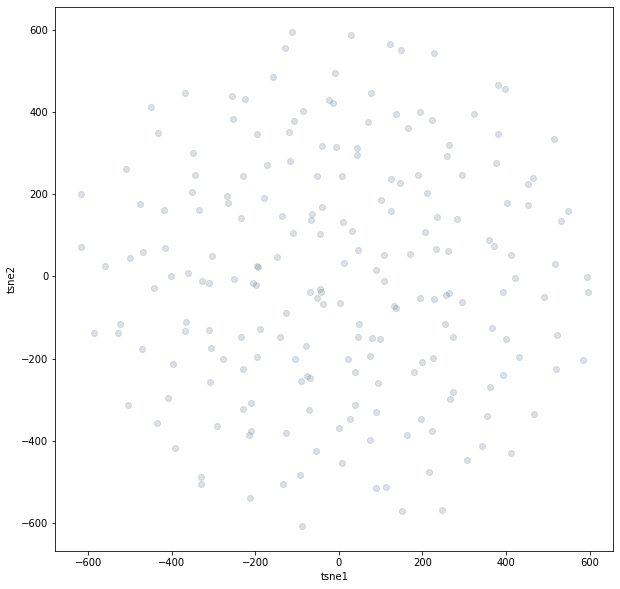

In [30]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [31]:
import matplotlib

In [32]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 207 nearest neighbors...
[t-SNE] Indexed 208 samples in 0.000s...
[t-SNE] Computed neighbors for 208 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 208 / 208
[t-SNE] Mean sigma: 0.855184
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.525536
[t-SNE] KL divergence after 1300 iterations: 0.421274


In [33]:
np.unique(labels)


array([0, 1, 2, 3, 4, 5], dtype=int32)

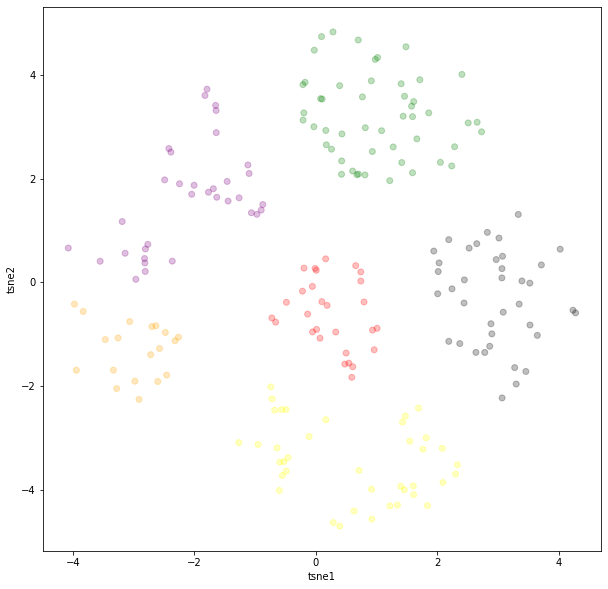

In [34]:
colors = ["red","green","blue","purple","yellow","cyan","black","orange"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [35]:
Z2 = ms.inverse_transform(Z)
Z2

array([[ 8.21428571e-01,  1.00000000e+00,  2.25000000e+00,
        -1.11022302e-16,  1.00000000e+00,  1.31785714e+01,
         1.37500000e+01,  1.37500000e+01,  3.75000000e+00,
         3.89285714e+00,  3.14285714e+00,  3.03571429e+00,
         2.96428571e+00,  3.03571429e+00],
       [ 1.08000000e+00,  1.00000000e+00,  2.10000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.31800000e+01,
         1.36200000e+01,  1.35000000e+01,  4.14000000e+00,
         3.78000000e+00,  3.30000000e+00,  3.10000000e+00,
         3.22000000e+00,  3.44000000e+00],
       [ 8.52941176e-01,  6.76470588e-01,  1.97058824e+00,
         1.00000000e+00,  1.00000000e+00,  1.30588235e+01,
         1.33529412e+01,  1.37058824e+01,  4.32352941e+00,
         3.44117647e+00,  3.29411765e+00,  2.91176471e+00,
         2.94117647e+00,  2.70588235e+00],
       [ 5.64102564e-01,  5.55111512e-16,  2.48717949e+00,
         5.55111512e-17,  4.10256410e-01,  1.38205128e+01,
         1.42051282e+01,  1.35384615e+01,  4.